<a href="https://colab.research.google.com/github/hyfoo-bot/project/blob/main/data/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import required libraries
from google.colab import files
import pandas as pd
#import io

# Step 2: Upload the file
#uploaded = files.upload()

# Step 3: Load the dataset
# Access the uploaded file data and decode it using 'latin-1' encoding.
# 'latin-1' encoding handles a broader range of characters and is less likely to fail.
df = pd.read_csv('/content/Global_Superstore (1).csv', encoding='latin-1')
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product Name'])
# Step 4: Verify the dataset
df.head(3)  # Check the first 3 rows

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,31-07-2012,Same Day,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,2309.650,7.0,0.0,762.1845,933.57,Critical
1,5/2/2013,7/2/2013,Second Class,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.395,9.0,0.1,-288.7650,923.63,Critical
2,17-10-2013,18-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.171,9.0,0.1,919.9710,915.49,Medium


In [ ]:
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Check the uploaded file name
print(uploaded.keys())  # This shows the exact name of the file

# Step 3: Use the correct file name to load the dataset
file_name = list(uploaded.keys())[0]  # Automatically get the uploaded file's name
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin-1')

# Step 4: Verify the dataset
print(df.head())
print(df.info())


In [ ]:
# Drop irrelevant columns
#df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product Name'], axis=1)

# Handle categorical variables with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check the dataset after encoding
df.head(3)
df.info()


,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Date_1/1/2014,Order Date_1/10/2011,Order Date_1/10/2012,Order Date_1/10/2013,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,10024.0,2309.650,7.0,0.0,762.1845,933.57,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,NaN,3709.395,9.0,0.1,-288.7650,923.63,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,NaN,5175.171,9.0,0.1,919.9710,915.49,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Order Date           0
Ship Date            0
Ship Mode            0
Segment              0
City                 0
State                1
Country              1
Postal Code       3663
Market               1
Region               1
Product ID           1
Category             1
Sub-Category         1
Sales                1
Quantity             1
Discount             1
Profit               1
Shipping Cost        1
Order Priority       1
dtype: int64


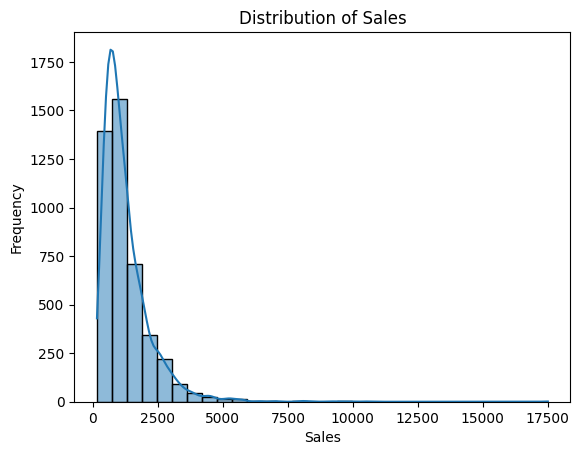

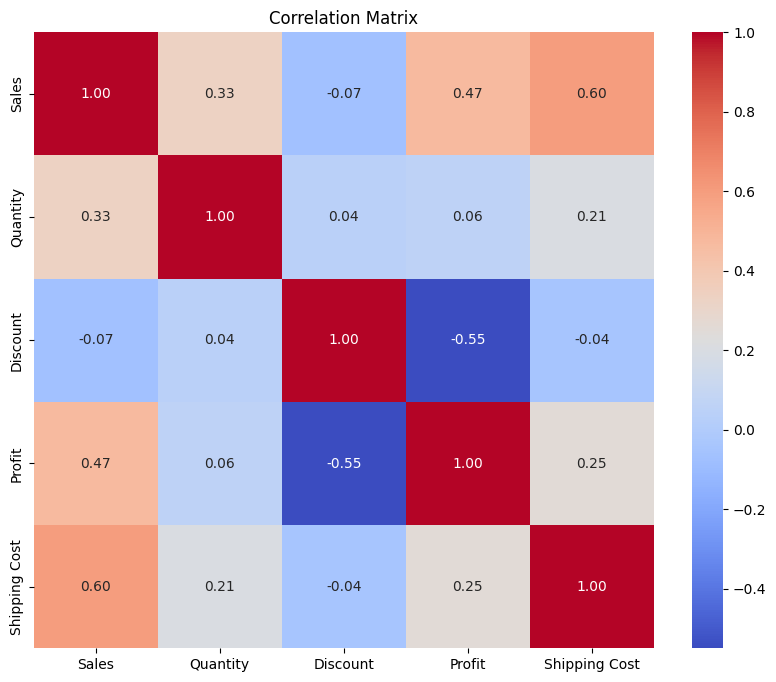

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Global sales distribution
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix for numerical columns
corr = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].corr()  # Include relevant numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import numpy as np
# we convert to numpy arrays for data splitting and model training
Y = np.array(data['Sales']) # this extracts the resale_price column
X = np.array(data.drop(columns='Sales')) # remove resale_price from the feature set
feature_names = list(data.columns) # names of the features
print(X,Y,feature_names) # display a few rows of all arrays for reference


In [ ]:
from sklearn.model_selection import train_test_split

# Define predictors (X) and target variable (y)
X = df.drop('Sales', axis=1)  # Use all other columns as features
y = df['Sales']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (41032, 18106)
Test set size: (10258, 18106)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Splitting data into features (X) and target variable (y)
X = df_cleaned.drop(columns=['Sales', 'Profit'])
y = df_cleaned['Sales']

# Creating a preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())]), X.select_dtypes(include=['object']).columns)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fitting the model to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Quantity', 'Discount', 'Shipping Cost'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [99]:
# Check for any invalid date entries in 'Order Date' and 'Ship Date'
print(df_cleaned['Order Date'].head())  # Preview the first few rows of 'Order Date'
print(df_cleaned['Ship Date'].head())   # Preview the first few rows of 'Ship Date'


0    31-07-2012
1      5/2/2013
2    17-10-2013
3    28-01-2013
4     5/11/2013
Name: Order Date, dtype: object
0    31-07-2012
1      7/2/2013
2    18-10-2013
3    30-01-2013
4     6/11/2013
Name: Ship Date, dtype: object


In [100]:
# Convert 'Order Date' and 'Ship Date' to datetime with dayfirst=True, handling errors gracefully
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], dayfirst=True, errors='coerce')
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], dayfirst=True, errors='coerce')

# Check for any 'NaT' values that could not be converted
print(df_cleaned['Order Date'].isna().sum())  # Count of missing values (NaT) in 'Order Date'
print(df_cleaned['Ship Date'].isna().sum())   # Count of missing values (NaT) in 'Ship Date'


1702
1716


In [101]:
# Drop rows with missing dates (NaT) or fill them with a placeholder (e.g., 'Unknown')
df_cleaned = df_cleaned.dropna(subset=['Order Date', 'Ship Date'])

# Alternatively, if you prefer to fill missing dates with a placeholder value (e.g., current date)
# df_cleaned['Order Date'].fillna(pd.to_datetime('2024-01-01'), inplace=True)
# df_cleaned['Ship Date'].fillna(pd.to_datetime('2024-01-01'), inplace=True)

# Re-check the missing values
print(df_cleaned['Order Date'].isna().sum())  # Ensure there are no missing values now
print(df_cleaned['Ship Date'].isna().sum())   # Ensure there are no missing values now


0
0


In [102]:
# Feature extraction from 'Order Date' and 'Ship Date'
df_cleaned['Order_Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order_Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order_Day'] = df_cleaned['Order Date'].dt.day
df_cleaned['Ship_Year'] = df_cleaned['Ship Date'].dt.year
df_cleaned['Ship_Month'] = df_cleaned['Ship Date'].dt.month

# Drop the original date columns
df_cleaned = df_cleaned.drop(columns=['Order Date', 'Ship Date'])

# Display the cleaned DataFrame
print(df_cleaned.head())


   Row ID         Order ID       Ship Mode Customer ID     Customer Name  \
0   32298   CA-2012-124891        Same Day    RH-19495       Rick Hansen   
2   25330    IN-2013-71249     First Class    CR-12730      Craig Reiter   
3   13524  ES-2013-1579342     First Class    KM-16375  Katherine Murray   
7   31192    IN-2012-86369  Standard Class    MB-18085        Mick Brown   
8   40155   CA-2014-135909  Standard Class    JW-15220         Jane Waco   

       Segment           City       State        Country  Postal Code  ...  \
0     Consumer  New York City    New York  United States      10024.0  ...   
2     Consumer       Brisbane  Queensland      Australia          NaN  ...   
3  Home Office         Berlin      Berlin        Germany          NaN  ...   
7     Consumer       Hamilton     Waikato    New Zealand          NaN  ...   
8    Corporate     Sacramento  California  United States      95823.0  ...   

  Quantity Discount     Profit Shipping Cost Order Priority Order_Year  \


<ipython-input-102-ad9abdbde14f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order_Year'] = df_cleaned['Order Date'].dt.year
<ipython-input-102-ad9abdbde14f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order_Month'] = df_cleaned['Order Date'].dt.month
<ipython-input-102-ad9abdbde14f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Load dataset (replace with the actual path to your dataset)
url = "https://path_to_your_global_superstore_dataset.csv"
df = pd.read_csv(url)

# Check for missing values or incorrect data formats
print(df.isnull().sum())

# Select features and target variable
X = df.drop(columns=['Sales', 'Profit'])  # Dropping target variables
y = df['Sales']  # Target variable

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
        ]), X.select_dtypes(include=['object']).columns)
    ])

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that combines preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)


URLError: <urlopen error [Errno -2] Name or service not known>

In [105]:
# Check for missing values or incorrect data formats
print(df.isnull().sum())

Postal Code                3663
Sales                         1
Quantity                      1
Discount                      1
Profit                        1
                           ... 
Sub-Category_Tables           0
Order Priority_Critical       0
Order Priority_High           0
Order Priority_Low            0
Order Priority_Medium         0
Length: 7214, dtype: int64


In [106]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [10, 20, None]      # Max depth of each tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
                           cv=3)  # 3-fold cross-validation

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Update the model with the best estimator
best_model = grid_search.best_estimator_


Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}


Mean Absolute Error (MAE): 510.13
Mean Squared Error (MSE): 651565.57
R² Score: 0.40


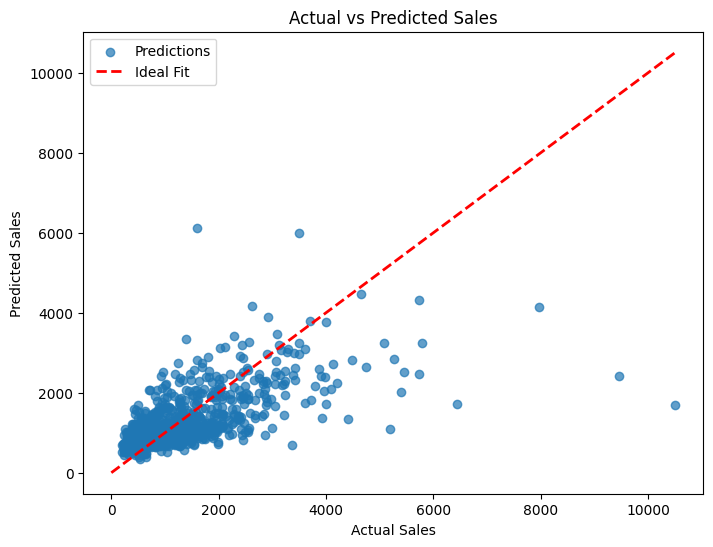

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Handle NaN values in Y_test (Replace with appropriate strategy if needed)
y_test = y_test.fillna(y_test.mean())  # Replace NaNs with mean

# Compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred_best)  # Use y_test
mse = mean_squared_error(y_test, y_pred_best)   # Use y_test
r2 = r2_score(y_test, y_pred_best)            # Use y_test

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_best, alpha=0.7, label="Predictions")
plt.plot([0, max(Y_test)], [0, max(Y_test)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()